In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
from scipy.integrate import quad
from scipy.interpolate import splev, splrep
from tqdm import tqdm
import os
import imageio

In [6]:
fp = open('output.txt','r')

Npart = int(fp.readline())
Nd = int(fp.readline())

fp.seek(0) # go back to the beginning of the file

Nlines = len(fp.readlines()) # the length of the output of fp.readlines() 
                             # is exactly the number of lines in the file
fp.close() # close the file

print("Npart =",Npart)
print("Nd =",Nd)
print("Nlines =",Nlines)

Nlines_in_snapshot = 3 + 3*Npart
Nsnapshots = Nlines//Nlines_in_snapshot
print("Nlines_in_snapshot =", Nlines_in_snapshot)
print("Nsnapshots =",Nsnapshots)

x = np.empty([Nsnapshots,Npart,Nd])
v = np.empty([Nsnapshots,Npart,Nd])
acc = np.empty([Nsnapshots,Npart,Nd])
print(x.shape)
print(v.shape)
print(acc.shape)
# read the masses:
m = np.genfromtxt('output.txt',skip_header=3,max_rows=Npart)

# read the times, positions and velocities
time = np.empty([Nsnapshots])

for i_snapshot in tqdm(range(Nsnapshots)):
    initial_line = i_snapshot*Nlines_in_snapshot
    initial_line_m = initial_line + 3
    initial_line_x = initial_line_m+Npart
    initial_line_v = initial_line_x+Npart
    #print(initial_line_v)
    #initial_line_acc = initial_line_v+Npart
    time[i_snapshot] = np.genfromtxt('output.txt',skip_header=initial_line+2,max_rows=1)
    x[i_snapshot] = np.genfromtxt('output.txt',skip_header=initial_line_x,max_rows=Npart)
    v[i_snapshot] = np.genfromtxt('output.txt',skip_header=initial_line_v,max_rows=Npart)
    #acc[i_snapshot] = np.genfromtxt('out_100m_acc_higher_v.txt',skip_header=initial_line_acc,max_rows=Npart)

Npart = 10002
Nd = 3
Nlines = 6661998
Nlines_in_snapshot = 30009
Nsnapshots = 222
(222, 10002, 3)
(222, 10002, 3)
(222, 10002, 3)


  7%|▋         | 16/222 [00:09<01:57,  1.76it/s]


KeyboardInterrupt: 

In [ ]:
time = np.linspace(0,3, Nsnapshots)

Posizione centro di massa:  [ 0.06552786  0.11757376 -0.03993477]
Posizione centro di massa:  [0.02062069 0.51031056 0.10293356]


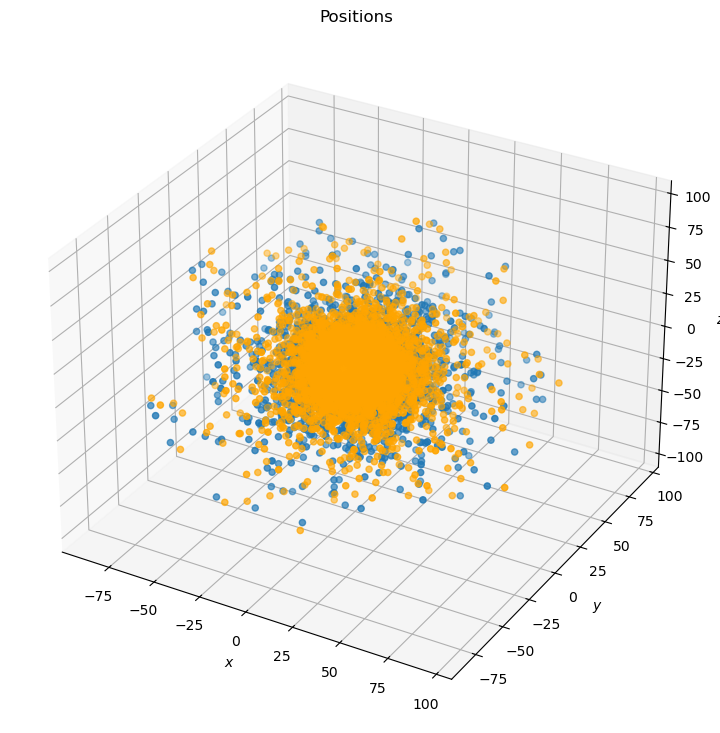

In [4]:
fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(projection='3d', computed_zorder=False)
#ax.set_box_aspect(None, zoom=0.9) # To prevent z axis label to be cut off

centro_massa = [0, 0, 0]
for particle in x[0]:
    centro_massa[0] =  centro_massa[0] + particle[0]
    centro_massa[1] =  centro_massa[1] + particle[1]
    centro_massa[2] =  centro_massa[2] + particle[2]
centro_massa = np.array(centro_massa)/Npart

ax.set_title("Positions")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

ax.scatter(x[0, :, 0], x[0, :, 1], x[0,:, 2])
#ax.scatter(centro_massa[0],centro_massa[1],centro_massa[2])
#ax.scatter(x[0,-1,0], x[0,-1,1],x[0,-1,2], color = 'red')
print('Posizione centro di massa: ', centro_massa)
#plt.show()

for particle in x[-1]:
    centro_massa[0] =  centro_massa[0] + particle[0]
    centro_massa[1] =  centro_massa[1] + particle[1]
    centro_massa[2] =  centro_massa[2] + particle[2]
centro_massa = np.array(centro_massa)/Npart

ax.set_title("Positions")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

ax.scatter(x[-1, :, 0], x[-1, :, 1], x[-1,:, 2], color = 'orange')
#ax.scatter(centro_massa[0],centro_massa[1],centro_massa[2])
#ax.scatter(x[0,-1,0], x[0,-1,1],x[0,-1,2], color = 'red')
print('Posizione centro di massa: ', centro_massa)
plt.show()

In [ ]:
print(x[0, 0])
print(x[-1, 0])

[-7.3032207  4.7607384  9.7582359]
[  4.3465962   -0.85413283 -10.090075  ]


Velocità centro di massa:  [-0.00053629  0.00282226  0.00072296]


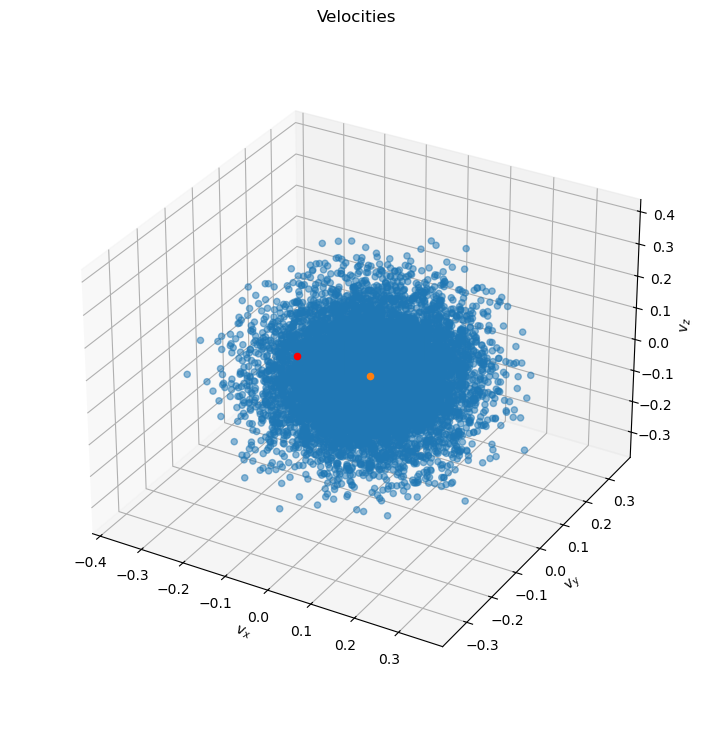

In [ ]:
# Initialise a 3D plot
fig = plt.figure(figsize=(16, 9))

centro_massa = [0, 0, 0]
for particle in v[0]:
    centro_massa[0] =  centro_massa[0] + particle[0]
    centro_massa[1] =  centro_massa[1] + particle[1]
    centro_massa[2] =  centro_massa[2] + particle[2]
centro_massa = np.array(centro_massa)/Npart


ax = fig.add_subplot(projection='3d', computed_zorder=False)
ax.set_box_aspect(None, zoom=0.9) # To prevent z axis label to be cut off

ax.set_title("Velocities")

ax.set_xlabel("$v_x$")
ax.set_ylabel("$v_y$")
ax.set_zlabel("$v_z$")

ax.scatter(v[0,1:, 0], v[0,1:, 1], v[0,1:, 2],
           alpha=0.5, zorder=0)

ax.scatter(centro_massa[0],centro_massa[1],centro_massa[2])
ax.scatter(v[0,-1, 0], v[0, -1, 1], v[0, -1, 2], color = 'red')
print('Velocità centro di massa: ', centro_massa)
plt.show()

Accelerazione centro di massa:  [0. 0. 0.]


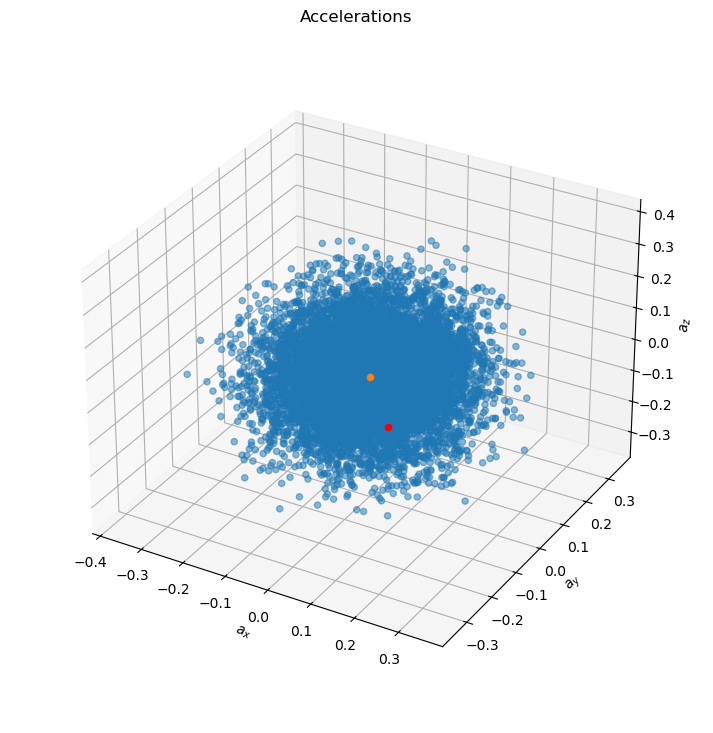

In [ ]:
# Initialise a 3D plot
fig = plt.figure(figsize=(16, 9))

centro_massa = [0, 0, 0]
for particle in acc[0]:
    centro_massa[0] =  centro_massa[0] + particle[0]
    centro_massa[1] =  centro_massa[1] + particle[1]
    centro_massa[2] =  centro_massa[2] + particle[2]
centro_massa = np.array(centro_massa)/Npart


ax = fig.add_subplot(projection='3d', computed_zorder=False)
ax.set_box_aspect(None, zoom=0.9) # To prevent z axis label to be cut off

ax.set_title("Accelerations")

ax.set_xlabel("$a_x$")
ax.set_ylabel("$a_y$")
ax.set_zlabel("$a_z$")

ax.scatter(v[0,1:, 0], v[0,1:, 1], v[0,1:, 2],
           alpha=0.5, zorder=0)

ax.scatter(centro_massa[0],centro_massa[1],centro_massa[2])
ax.scatter(v[0,0, 0], v[0,0, 1], v[0,0, 2], color = 'red')
print('Accelerazione centro di massa: ', centro_massa)
plt.show()

In [ ]:
quad_acc =acc**2
mod_acc = np.empty([Nsnapshots,Npart])
for t in range(Nsnapshots):
    for p in range(Npart):
        mod_acc[t][p] = np.sqrt(quad_acc[t][p][0] +quad_acc[t][p][1] +quad_acc[t][p][2])


In [ ]:
print(acc[0][1][0],acc[0][1][1],acc[0][1][2])
print(acc[0][1][0]**2,acc[0][1][1]**2,acc[0][1][2]**2)
print(quad_acc[0][1][0],quad_acc[0][1][1],quad_acc[0][1][2])
print(mod_acc[0][1])
print(np.sqrt(quad_acc[0][1][0] +quad_acc[0][1][1] +quad_acc[0][1][2]))

0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0
0.0
0.0


Velocità perturber: 0.18
Velocità media particelle: 0.16
Velocità perturber: 0.19
Velocità media particelle: 0.16
Velocità perturber: 0.20
Velocità media particelle: 0.16


C:\Users\hp\AppData\Local\Temp\ipykernel_13892\178769478.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(time[5:], mod_acc[5:, 0]/max(mod_acc[5:, 0]), label = 'accelerations')


IndexError: index 25 is out of bounds for axis 0 with size 16

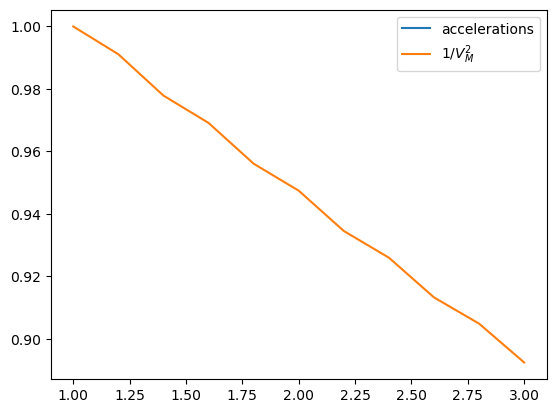

In [ ]:
v_perturber = np.sqrt(v[:, 0, 0]**2+v[:,0, 1]**2+v[:, 0, 2]**2)
#print(v_perturber.shape)
plt.plot(time[5:], mod_acc[5:, 0]/max(mod_acc[5:, 0]), label = 'accelerations')
plt.plot(time[5:], 1/(v_perturber[5:]**2)/max(1/(v_perturber[5:]**2)), label = r'$1/V_M^2$')
#plt.plot(time,v_perturber/max(v_perturber), label = r'$V_M$')
plt.legend()

indeces = [0, 5, 15, 25, 35, 45]
for index_time in indeces:
    print('Velocità perturber: %0.2f' % np.sqrt(v[index_time, 0, 0]**2+v[index_time,0, 1]**2+v[index_time, 0, 2]**2))
    print('Velocità media particelle: %0.2f' %np.mean(np.sqrt(v[index_time, 1:, 0]**2+v[index_time,1:, 1]**2+v[index_time, 1:, 2]**2)))

Velocità perturber: 2.02
Velocità media particelle: 1.58
Velocità perturber: 1.72
Velocità media particelle: 1.57
Velocità perturber: 1.76
Velocità media particelle: 1.54
Velocità perturber: 1.79
Velocità media particelle: 1.52
Velocità perturber: 1.92
Velocità media particelle: 1.49
Velocità perturber: 1.55
Velocità media particelle: 1.48


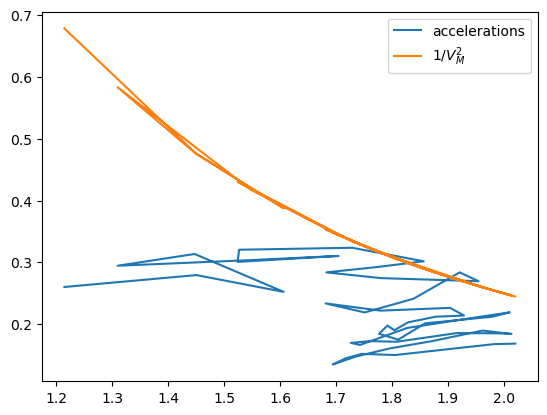

In [ ]:
v_perturber = np.sqrt(v[:, 0, 0]**2+v[:,0, 1]**2+v[:, 0, 2]**2)
#print(v_perturber.shape)
plt.plot(v_perturber, mod_acc[:, 0], label = 'accelerations')
plt.plot(v_perturber, 1/(v_perturber**2), label = r'$1/V_M^2$')
#plt.plot(v_perturber,v_perturber, label = r'$V_M$')
plt.legend()

indeces = [0, 5, 15, 25, 35, 45]
for index_time in indeces:
    print('Velocità perturber: %0.2f' % np.sqrt(v[index_time, 0, 0]**2+v[index_time,0, 1]**2+v[index_time, 0, 2]**2))
    print('Velocità media particelle: %0.2f' %np.mean(np.sqrt(v[index_time, 1:, 0]**2+v[index_time,1:, 1]**2+v[index_time, 1:, 2]**2)))

In [5]:
# MOVIE MAKER

#------------------------------------------------------------------------

# Toggle on/off the movie maker
make_movie = True

if make_movie:
    # FOLDERS MANAGING

    #-------------------------------------------------------------------------
    # File paths variables
    movie_dir_path = "movie"
    frames_dir_path = os.path.join(movie_dir_path, "frames")
    movie_frame_name_prefix = "snapshot_img_"
    movie_name = "movie.mp4"

    # Create folders to store the movie and its frames
    if not os.path.isdir(movie_dir_path):
        os.makedirs(frames_dir_path)
    
    # Empty the 'frames' folder
    for file_name in os.listdir(frames_dir_path):
        file_path = os.path.join(frames_dir_path, file_name)
        os.remove(file_path)
    
    # Empty the 'movie' folder
    for file_name in os.listdir(movie_dir_path):
        file_path = os.path.join(movie_dir_path, file_name)
        if os.path.isfile(file_path):
            os.remove(file_path)
    
    #------------------------------------------------------------------------
    # GENERATING FRAMES

    #------------------------------------------------------------------------
    # Rough estimate of the number of frames of the movie
    # Lowering it increases the step between snapshots that are considered
    # Use in a cycle below. If N_frames = len(snapshots) all frames are used
    N_frames = Nsnapshots
    
    # If True, frames will be deleted after the movie has been assembled
    delete_frames = False

    # In order to efficiently plot data with the purpose of making a movie is useful
    # to swap the axis of the array. This is not necessary, but otherwise plotting fucntions
    # would take a lot of time to run
    # "new_pos" works like this: new_pos[time_index][coordinate_index][particle_index]
    # So new_pos[time_index][coordinate_index] gives the values of the specified
    # coordinate at the specified time for all particles
    #image_pos = np.swapaxes(pos, 0, 1) # Swap particle and time
    #image_pos = np.swapaxes(image_pos, 1, 2) # Swap particle and coordinate

    # Initialize a list to store the colors of each particle at any time
    color_cm = 'black'

    for time_index in tqdm(range(0, Nsnapshots)):
        # Initialize a 3D plot
        fig = plt.figure(figsize=(16, 9))

        # computed_zorder=False is to allow manual setting of the order of the plots
        ax = fig.add_subplot(projection='3d', computed_zorder=False)
        ax.set_box_aspect(None, zoom=0.9) # To prevent z axis label to be cut off

        # Plot the points and save the returned value from scatter() to make a colorbar
        p_plot = ax.scatter(x[time_index, :, 0], x[time_index, :, 1], x[time_index,:, 2], alpha=0.8,)
        
        # Set e cubic plot for every snapshot and fix the axes limit to the initial ones
        #ax.set_aspect('equal', 'datalim')
        # Set the snapshot time stamp as the title of every plot
        t = float(np.format_float_scientific(time[time_index], 2))
        ax.set_title(r"$t={t}$".format(t=t))
        ax.set_xlabel(r"$x$")
        ax.set_ylabel(r"$y$")
        ax.set_zlabel(r"$z$")
        ax.set_xlim(-100, 100)
        ax.set_ylim(-100, 100)
        ax.set_zlim(-100, 100)
        # Save the current figure with a proper name
        # zfill() is needed to achieve alphanumerical order later
        frame_name = movie_frame_name_prefix + str(time_index).zfill(5) + ".png"
        frame_path = os.path.join(frames_dir_path, frame_name)
        fig.savefig(frame_path)

        # Close the current plot
        plt.close()

    #--------------------------------------------------------------------
    # ASSEMBLING FRAMES

    #--------------------------------------------------------------------
    # Get all the files in the frames directory and sort them in alphanumerical order
    movie_img_files = os.listdir(frames_dir_path)
    movie_img_files = sorted(movie_img_files)

    movie_path = os.path.join(movie_dir_path, movie_name)

    # Use the imageio writer to build the movie by appending to it every frame
    # Default fps is 10. 'I' stands for 'multiple images'
    with imageio.get_writer(movie_path, mode='I', fps=10) as writer:
        for filename in movie_img_files:
            image = imageio.imread(os.path.join(frames_dir_path, filename)) # Get the frame
            writer.append_data(image) # Append the frame
    
    # Delete individual frames if requested
    if delete_frames:
        for file_name in os.listdir(frames_dir_path):
            file_path = os.path.join(frames_dir_path, file_name)
            os.remove(file_path)

100%|██████████| 201/201 [02:48<00:00,  1.19it/s]
C:\Users\hp\AppData\Local\Temp\ipykernel_9800\1545731429.py:102: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join(frames_dir_path, filename)) # Get the frame
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1600, 900) to (1600, 912) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [ ]:
movie_path

'movie\\movie.mp4'